<a href="https://www.kaggle.com/code/sofianostzitziris/vehicle-prediction-price?scriptVersionId=148567762" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
raw_data = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv')

raw_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
raw_data.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [4]:
data = raw_data.drop(['name','mileage','engine','max_power','torque'],axis=1)

data.shape

(8128, 8)

In [5]:
data.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
seats            221
dtype: int64

In [6]:
#drop missing values
data_no_mv = data.dropna(axis=0)

In [7]:
data_no_mv.describe(include='all')

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats
count,7907.000000,7.907000e+03,7.907000e+03,7907,7907,7907,7907,7907.000000
unique,NaN,NaN,NaN,4,3,2,5,NaN
top,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN
freq,NaN,NaN,NaN,4299,6564,6866,5215,NaN
mean,2013.982168,6.497417e+05,6.919256e+04,NaN,NaN,NaN,NaN,5.416719
std,3.866650,8.135565e+05,5.678976e+04,NaN,NaN,NaN,NaN,0.959588
min,1994.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,NaN,NaN,NaN,NaN,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,5.000000
75%,2017.000000,6.900000e+05,9.575000e+04,NaN,NaN,NaN,NaN,5.000000


In [8]:
# Get the names of categorical columns
categorical_columns = data_no_mv.select_dtypes(include=['category', 'object']).columns.tolist()

# Get the names of numerical columns
numerical_columns = data_no_mv.select_dtypes(include=['number']).columns.tolist()

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: ['fuel', 'seller_type', 'transmission', 'owner']
Numerical columns: ['year', 'selling_price', 'km_driven', 'seats']


### Exploring the PDFs

/tmp/ipykernel_26/79971855.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['selling_price'])


<Axes: xlabel='selling_price', ylabel='Density'>

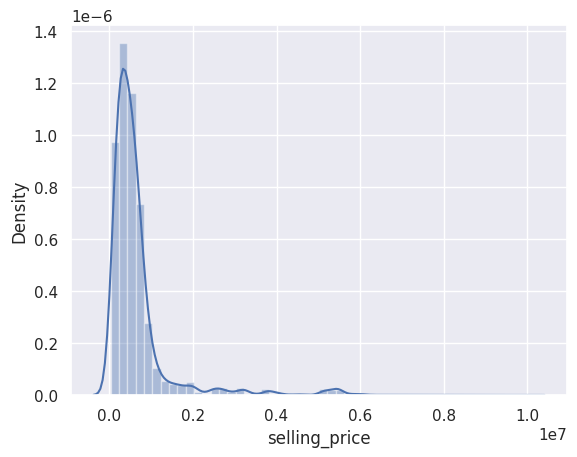

In [9]:
sns.distplot(data_no_mv['selling_price'])

### Dealing with outliers

In [10]:
q = data_no_mv['selling_price'].quantile(0.99)

data_1 = data_no_mv[data_no_mv['selling_price']<q]

data_1.describe(include='all')

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats
count,7824.000000,7.824000e+03,7.824000e+03,7824,7824,7824,7824,7824.000000
unique,NaN,NaN,NaN,4,3,2,5,NaN
top,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN
freq,NaN,NaN,NaN,4222,6557,6866,5135,NaN
mean,2013.930982,5.971662e+05,6.979484e+04,NaN,NaN,NaN,NaN,5.421779
std,3.854452,6.341355e+05,5.677805e+04,NaN,NaN,NaN,NaN,0.962689
min,1994.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,2.000000
25%,2012.000000,2.650000e+05,3.500000e+04,NaN,NaN,NaN,NaN,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,5.000000


/tmp/ipykernel_26/824799782.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['selling_price'])


<Axes: xlabel='selling_price', ylabel='Density'>

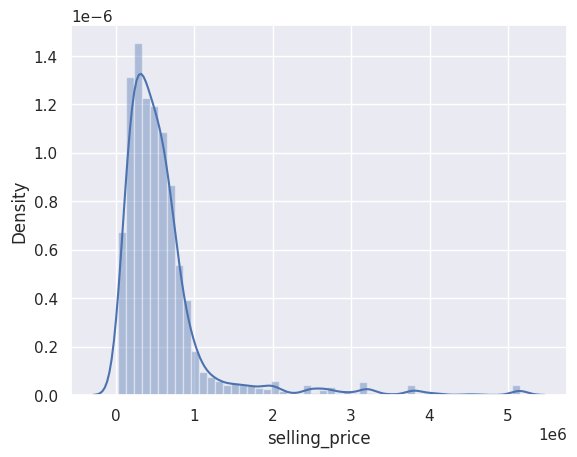

In [11]:
sns.distplot(data_1['selling_price'])

/tmp/ipykernel_26/1574072123.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['km_driven'])


<Axes: xlabel='km_driven', ylabel='Density'>

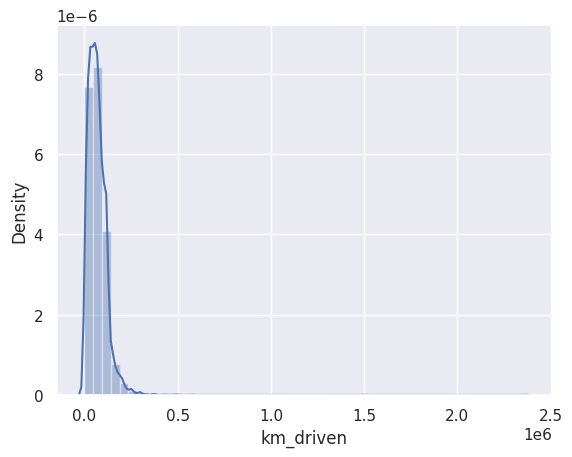

In [12]:
sns.distplot(data_no_mv['km_driven'])

/tmp/ipykernel_26/3655158875.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['km_driven'])


<Axes: xlabel='km_driven', ylabel='Density'>

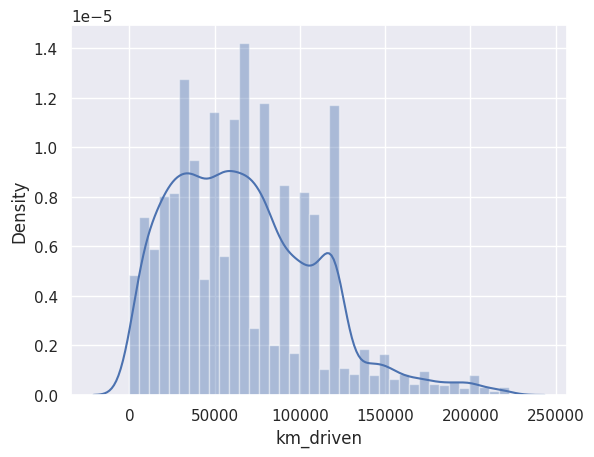

In [13]:
q = data_1['km_driven'].quantile(0.99)
data_2 = data_1[data_1['km_driven']<q]
sns.distplot(data_2['km_driven'])

/tmp/ipykernel_26/400382879.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['year'])


<Axes: xlabel='year', ylabel='Density'>

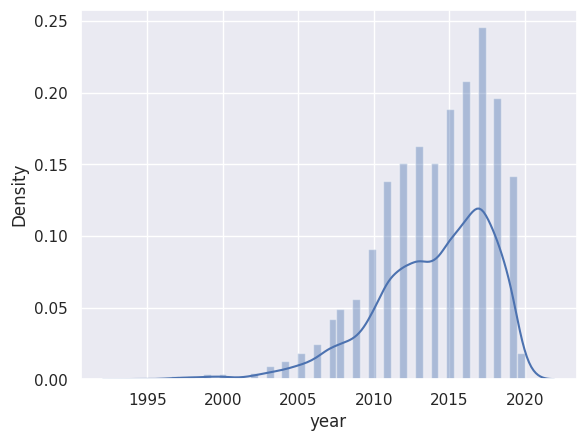

In [14]:
sns.distplot(data_no_mv['year'])

/tmp/ipykernel_26/1284839829.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['year'])


<Axes: xlabel='year', ylabel='Density'>

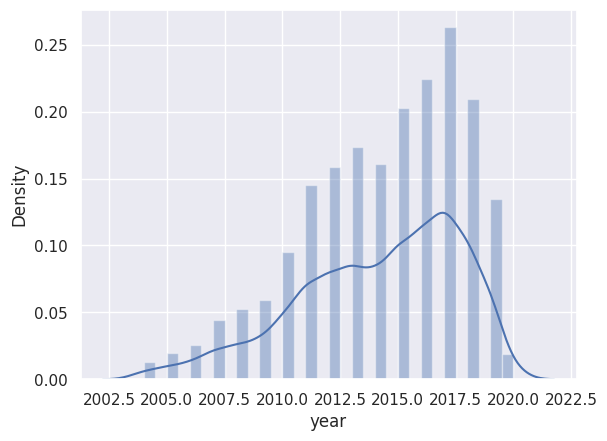

In [15]:
q = data_2['year'].quantile(0.01)
data_3 = data_2[data_2['year']>q]
sns.distplot(data_3['year'])

/tmp/ipykernel_26/1604155220.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['seats'])


<Axes: xlabel='seats', ylabel='Density'>

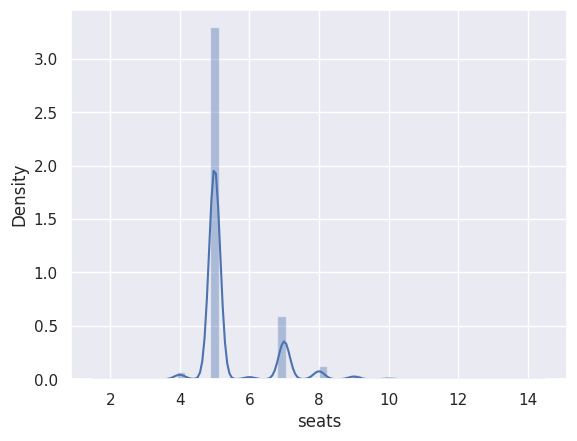

In [16]:
sns.distplot(data_no_mv['seats'])

/tmp/ipykernel_26/3122579196.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['seats'])


<Axes: xlabel='seats', ylabel='Density'>

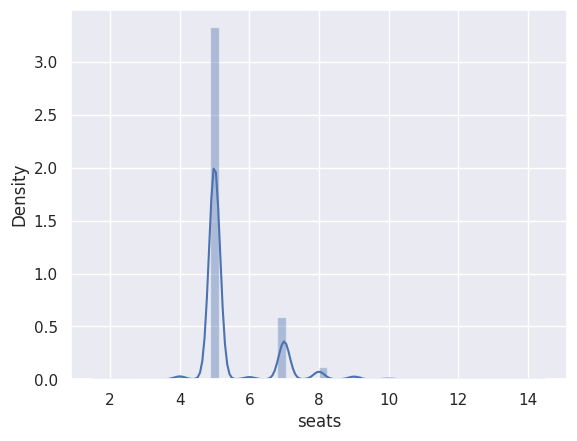

In [17]:
data_4 = data_3[data_3['seats']<15]
sns.distplot(data_4['seats'])

In [18]:
data_cleaned = data_4.reset_index(drop=True)

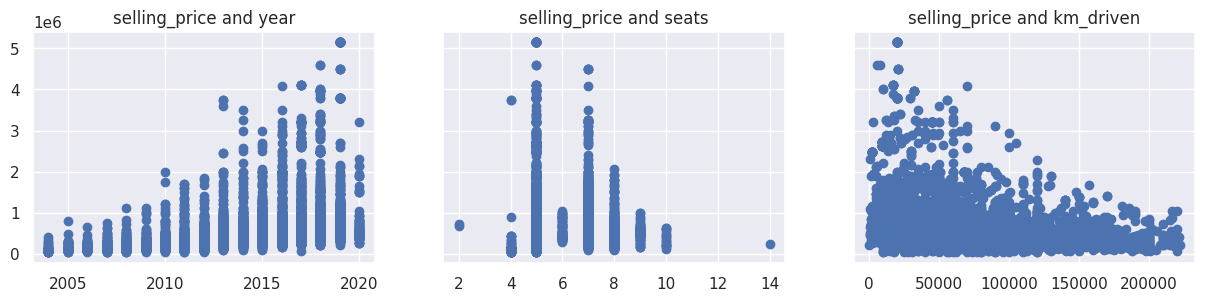

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['year'],data_cleaned['selling_price'])
ax1.set_title('selling_price and year')
ax2.scatter(data_cleaned['seats'],data_cleaned['selling_price'])
ax2.set_title('selling_price and seats')
ax3.scatter(data_cleaned['km_driven'],data_cleaned['selling_price'])
ax3.set_title('selling_price and km_driven')


plt.show()

/tmp/ipykernel_26/3378673923.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['selling_price'])


<Axes: xlabel='selling_price', ylabel='Density'>

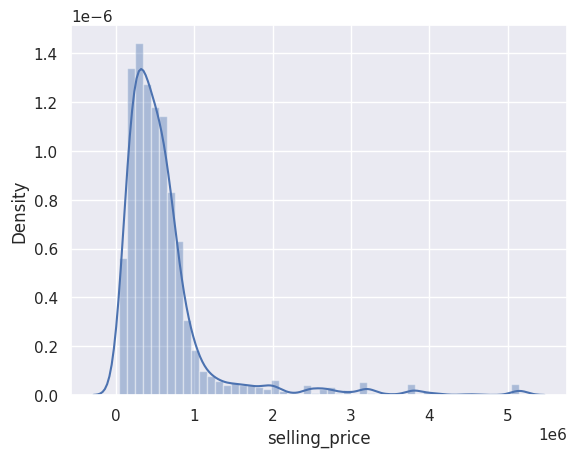

In [20]:
sns.distplot(data_cleaned['selling_price'])

In [21]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['selling_price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,log_price
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,13.017003
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,12.821258
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,11.970350
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,12.323856
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,11.775290
...,...,...,...,...,...,...,...,...,...
7626,2013,320000,110000,Petrol,Individual,Manual,First Owner,5.0,12.676076
7627,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0,11.813030
7628,2009,382000,120000,Diesel,Individual,Manual,First Owner,5.0,12.853176
7629,2013,290000,25000,Diesel,Individual,Manual,First Owner,5.0,12.577636


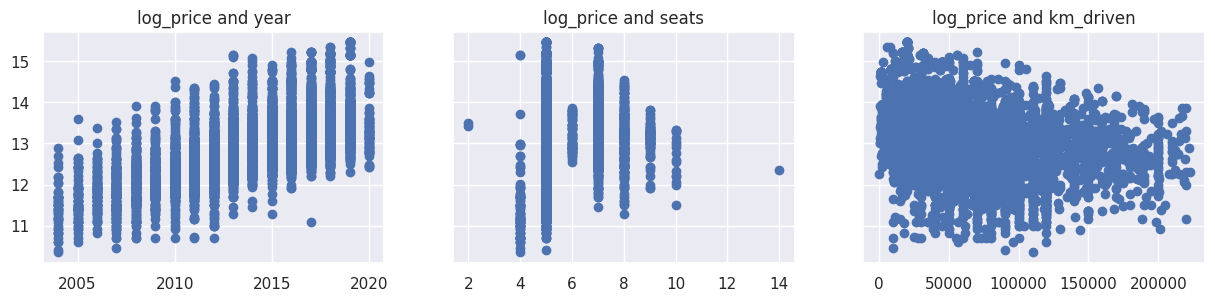

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['year'],data_cleaned['log_price'])
ax1.set_title('log_price and year')
ax2.scatter(data_cleaned['seats'],data_cleaned['log_price'])
ax2.set_title('log_price and seats')
ax3.scatter(data_cleaned['km_driven'],data_cleaned['log_price'])
ax3.set_title('log_price and km_driven')


plt.show()

In [23]:
data_cleaned = data_cleaned.drop(['selling_price'],axis=1)

### Multicollinearity

In [24]:
data_cleaned.columns.values

array(['year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'seats', 'log_price'], dtype=object)

In [25]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# check for multicollinearity with VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['year','km_driven','seats']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [26]:
vif

,VIF,Features
0,33.938782,year
1,3.728006,km_driven
2,35.948799,seats


In [27]:
data_no_multicollinearity = data_cleaned.drop(['seats'],axis=1)

In [28]:
categorical_columns = data_no_multicollinearity.select_dtypes(include=['object']).columns
numerical_columns = data_no_multicollinearity.select_dtypes(exclude=['object']).columns

print("Categorical Columns:")
print(categorical_columns)
print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

Numerical Columns:
Index(['year', 'km_driven', 'log_price'], dtype='object')


In [29]:
data_no_multicollinearity.head(2)

,year,km_driven,fuel,seller_type,transmission,owner,log_price
0,2014,145500,Diesel,Individual,Manual,First Owner,13.017003
1,2014,120000,Diesel,Individual,Manual,Second Owner,12.821258


### Create dummy variables

In [30]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [31]:
data_with_dummies.head()

,year,km_driven,log_price,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,13.017003,True,False,False,True,False,True,False,False,False,False
1,2014,120000,12.821258,True,False,False,True,False,True,False,True,False,False
2,2006,140000,11.970350,False,False,True,True,False,True,False,False,False,True
3,2010,127000,12.323856,True,False,False,True,False,True,False,False,False,False
4,2007,120000,11.775290,False,False,True,True,False,True,False,False,False,False


In [32]:
data_with_dummies.shape

(7631, 13)

In [33]:
data_with_dummies.columns.values

array(['year', 'km_driven', 'log_price', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'], dtype=object)

In [34]:
cols = ['log_price', 'year', 'km_driven', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner']

In [35]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,year,km_driven,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,13.017003,2014,145500,True,False,False,True,False,True,False,False,False,False
1,12.821258,2014,120000,True,False,False,True,False,True,False,True,False,False
2,11.970350,2006,140000,False,False,True,True,False,True,False,False,False,True
3,12.323856,2010,127000,True,False,False,True,False,True,False,False,False,False
4,11.775290,2007,120000,False,False,True,True,False,True,False,False,False,False


In [36]:
variables

,year,km_driven,seats
0,2014,145500,5.0
1,2014,120000,5.0
2,2006,140000,5.0
3,2010,127000,5.0
4,2007,120000,5.0
...,...,...,...
7626,2013,110000,5.0
7627,2007,119000,5.0
7628,2009,120000,5.0
7629,2013,25000,5.0


# Linear regression model

In [37]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [39]:
inputs_scaled = scaler.transform(inputs)

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [41]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [42]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

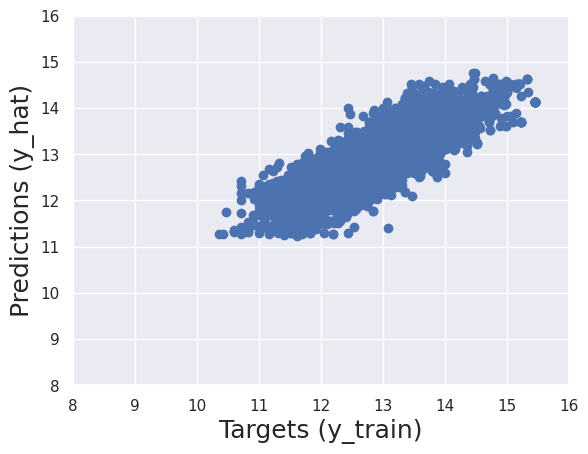

In [43]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(8,16)
plt.ylim(8,16)
plt.show()

/tmp/ipykernel_26/2445873480.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

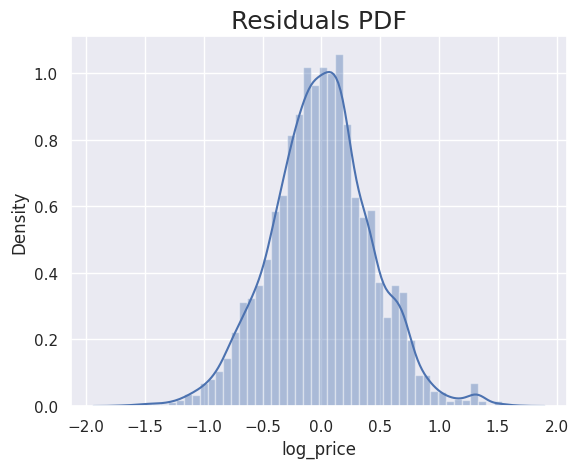

In [44]:
# Another useful check of our model is a residual plot
#Residuals = Difference between the targets and the predictions

sns.distplot(y_train - y_hat)

plt.title("Residuals PDF", size=18)

In [45]:
#R-squared of the model
reg.score(x_train,y_train)

0.685487431445905

In [46]:
reg.intercept_

12.998061537909763

In [47]:
reg.coef_

array([ 0.43506451, -0.01165562,  0.31371305,  0.009981  ,  0.06116516,
       -0.06530954,  0.00239122, -0.23716526, -0.01521255, -0.02330235,
        0.00307084, -0.01870452])

In [48]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,year,0.435065
1,km_driven,-0.011656
2,fuel_Diesel,0.313713
3,fuel_LPG,0.009981
4,fuel_Petrol,0.061165
5,seller_type_Individual,-0.065310
6,seller_type_Trustmark Dealer,0.002391
7,transmission_Manual,-0.237165
8,owner_Fourth & Above Owner,-0.015213
9,owner_Second Owner,-0.023302


# Testing

In [49]:
y_hat_test = reg.predict(x_test)

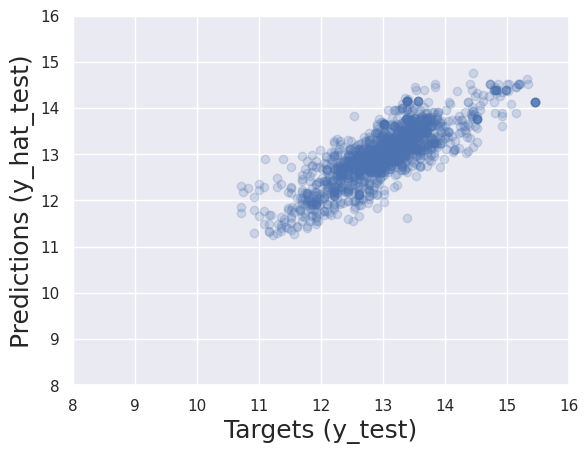

In [50]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(8,16)
plt.ylim(8,16)
plt.show()

In [51]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,945151.423947
1,700917.865689
2,217547.725585
3,977038.034172
4,319894.058387


In [52]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,945151.423947,NaN
1,700917.865689,NaN
2,217547.725585,NaN
3,977038.034172,NaN
4,319894.058387,NaN
...,...,...
1522,335601.918185,NaN
1523,193285.609543,NaN
1524,931055.339046,NaN
1525,561469.422563,NaN


In [53]:
y_test = y_test.reset_index(drop=True)

y_test.head()

0    14.508658
1    12.860999
2    12.847927
3    13.514405
4    12.429216
Name: log_price, dtype: float64

In [54]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,945151.423947,2000000.0
1,700917.865689,385000.0
2,217547.725585,380000.0
3,977038.034172,740000.0
4,319894.058387,250000.0
...,...,...
1522,335601.918185,215000.0
1523,193285.609543,125000.0
1524,931055.339046,1550000.0
1525,561469.422563,310000.0


In [55]:
#df_pf['Prediction'] = df_pf['Prediction'].apply(lambda x: '{:.2f}'.format(pd.to_numeric(x)))
#df_pf

In [56]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']


In [57]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,945151.423947,2000000.0,1.054849e+06,52.742429
1,700917.865689,385000.0,-3.159179e+05,82.056588
2,217547.725585,380000.0,1.624523e+05,42.750599
3,977038.034172,740000.0,-2.370380e+05,32.032167
4,319894.058387,250000.0,-6.989406e+04,27.957623
...,...,...,...,...
1522,335601.918185,215000.0,-1.206019e+05,56.093915
1523,193285.609543,125000.0,-6.828561e+04,54.628488
1524,931055.339046,1550000.0,6.189447e+05,39.931914
1525,561469.422563,310000.0,-2.514694e+05,81.119169


In [58]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
604,719621.64,720000.00,378.36,0.05
542,84908.67,85000.00,91.33,0.11
1227,136185.92,136000.00,-185.92,0.14
6,599047.07,600000.00,952.93,0.16
1083,229629.23,229999.00,369.77,0.16
...,...,...,...,...
907,213849.10,50000.00,-163849.10,327.70
291,196799.91,46000.00,-150799.91,327.83
129,402531.39,88000.00,-314531.39,357.42
609,222675.85,45000.00,-177675.85,394.84
